In [1]:
#import pysindy as ps
#import numpy as np
#import pprint as pp
#from scipy.integrate import solve_ivp

#from pysindy.feature_library import FourierLibrary
#from pysindy.feature_library import ConcatLibrary
import numpy as np
import matplotlib.pyplot as plt
from dynamicalsystems import SimplePendulum

In [2]:
sp = SimplePendulum(g=9.8,l=2,mu=0.1,theta0=np.pi/2)

print(np.shape(sp.X))

(2, 10000)


In [3]:
rect = sp.get_xy()
for i in range(0,10):
    print((rect[0,i*100],rect[1,i*100]))

(1.0, 6.123233995736766e-17)
(0.9997017753947807, 0.02442048878551808)
(0.9952663635163026, 0.09718469865691265)
(0.9763309292816917, 0.21628203006248187)
(0.9268147016044334, 0.37551898605780937)
(0.8280139427678003, 0.5607075089403761)
(0.6648227087086682, 0.7470011820507845)
(0.43432846679916814, 0.900754563090237)
(0.15253959055234723, 0.9882973607746417)
(-0.14689086456437808, 0.9891527050498975)


The DynamicalSystems class now has a embed, and unembed method

In [4]:
n = 15 #dim of embed space
ittr = 3 #number of plots to show

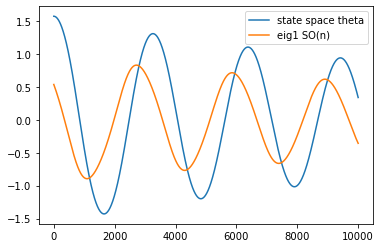

unembed error : 1.621024009737409e-11


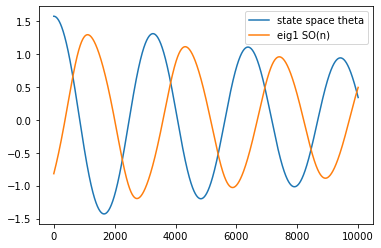

unembed error : 7.767319061690265e-12


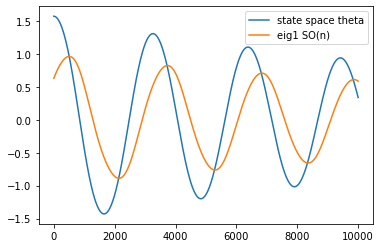

unembed error : 4.25403369327197e-12


In [5]:
for i in range(0,ittr): #lets look at some plots of random enbedings
    sp.embed(n,mat='SO')
    plt.plot(sp.X[0,:],label='state space theta') #plot x, this is the state space
    plt.plot(sp.Z[0,:],label='eig1 SO(n)') #plot z, this is state space * SO(n)
    plt.legend()
    plt.show()
    rec = sp.unembed()
    print("unembed error : " + str(rec['err']))

X_rec = rec['X']

gaussian noise can be added by seting sigma to a non negative number - obviusly with noise you loose infromation

note: unembed fails to recover data when mu is added


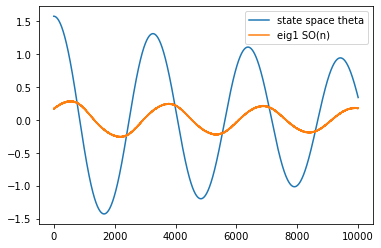

unembed error : 319.7798436460604


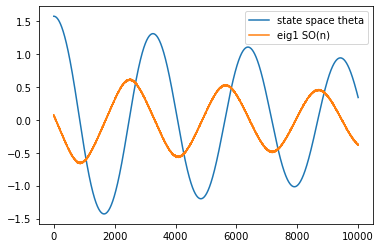

unembed error : 320.35887339440893


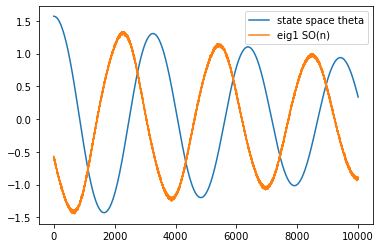

unembed error : 317.09793265203933


In [6]:
print("note: unembed fails to recover data when mu is added")
for i in range(0,ittr): #lets look at some plots of random enbedings with noise
    sp.embed(n,mu=0,sigma=0.02)
    plt.plot(sp.X[0,:],label='state space theta') #plot x, this is the state space
    plt.plot(sp.Z[0,:],label='eig1 SO(n)') #plot z, this is state space * SO(n)
    plt.legend()
    plt.show()
    rec = sp.unembed()
    print("unembed error : " + str(rec['err']))

X_rec = rec['X']

we can also multiply the system by a random gaussian matrix and use a Moore–Penrose inverse to attempt to unembed

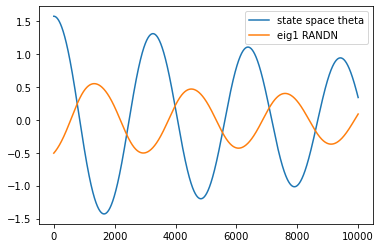

unembed error : 2.1799699630001204e-12


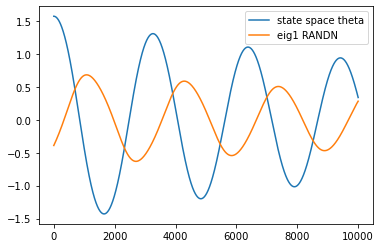

unembed error : 8.847458766041067e-12


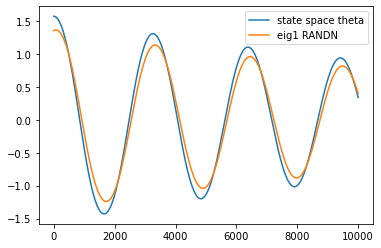

unembed error : 4.0091443464550025e-12


In [7]:
for i in range(0,ittr): #lets look at some plots of random enbedings
    sp.embed(n,mat='RANDN')
    plt.plot(sp.X[0,:],label='state space theta') #plot x, this is the state space
    plt.plot(sp.Z[0,:],label='eig1 RANDN') #plot z, this is state space * SO(n)
    plt.legend()
    plt.show()
    rec = sp.unembed()
    print("unembed error : " + str(rec['err']))

X_rec = rec['X']

we can also multiply the system by a random gaussian matrix and use a Moore–Penrose inverse to attempt to unembed
With gaussian noise

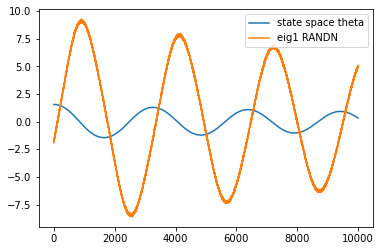

unembed error : 318.07138964302646


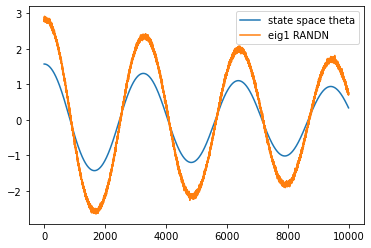

unembed error : 317.39902132770635


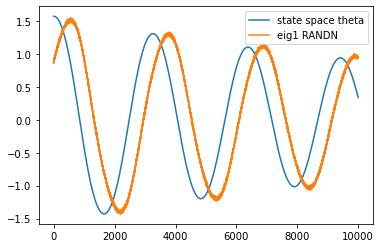

unembed error : 320.1266153917812


In [8]:
for i in range(0,ittr): #lets look at some plots of random enbedings
    sp.embed(n,mat='RANDN',mu=0,sigma=0.02)
    plt.plot(sp.X[0,:],label='state space theta') #plot x, this is the state space
    plt.plot(sp.Z[0,:],label='eig1 RANDN') #plot z, this is state space * SO(n)
    plt.legend()
    plt.show()
    rec = sp.unembed()
    print("unembed error : " + str(rec['err']))

X_rec = rec['X']

even more fun

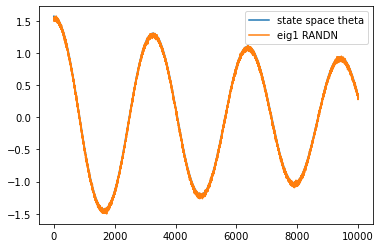

unembed error : 643.0891321625566


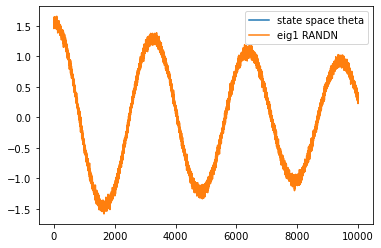

unembed error : 757.0804693148084


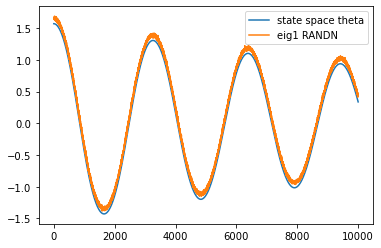

unembed error : 1759.0217149302166


In [9]:
for i in range(0,ittr): #lets look at some plots of random enbedings
    sp.embed(n,mat='RANDN',
             mu=0.1*np.random.randn(),sigma=0.02*np.random.randn(),
             mu1=0.1*np.random.randn(),sigma1=0.02*np.random.randn())
    rec = sp.unembed()
    plt.plot(sp.X[0,:],label='state space theta') #plot x, this is the state space
    plt.plot(rec['X'][0,:],label='eig1 RANDN') #plot z, this is state space * SO(n)
    plt.legend()
    plt.show()
    
    print("unembed error : " + str(rec['err']))

X_rec = rec['X']